In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Phi-Psi

In [2]:
data = np.loadtxt('./phi_psi/grid_phi_psi.dat',comments=['#'])
phi = data[:, 0]  # assuming the first column is phi
psi = data[:, 1]  # assuming the second column is psi

unique_phi = np.unique(phi)
unique_psi = np.unique(psi)

free_energy_grid= np.empty((len(unique_psi), len(unique_phi)))

for row in data:
    phi_idx = np.where(unique_phi == row[0])[0][0]
    psi_idx = np.where(unique_psi == row[1])[0][0]
    free_energy_grid[-phi_idx, -psi_idx] = -row[2]

Text(0.5, 1.0, 'Free Energy Surface in phi, psi Space')

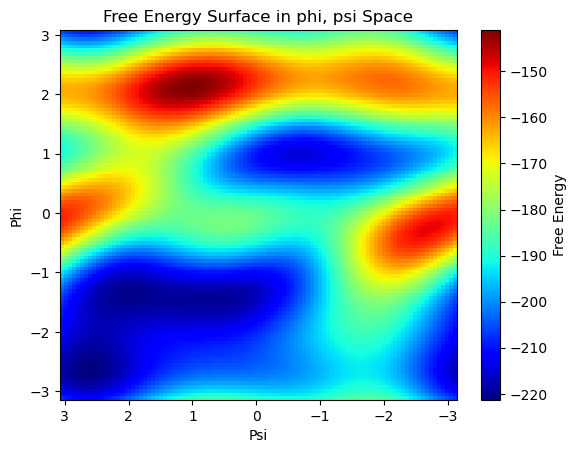

In [3]:
plt.imshow(free_energy_grid, origin='upper', aspect='auto', cmap='jet',extent=[unique_psi.max(), unique_psi.min(),unique_phi.min(), unique_phi.max()])
plt.colorbar(label='Free Energy')
# plt.contour(unique_psi,unique_phi, free_energy_grid, colors='grey', linewidths=0.5)
plt.xlabel('Psi')
plt.ylabel('Phi')
plt.title('Free Energy Surface in phi, psi Space')

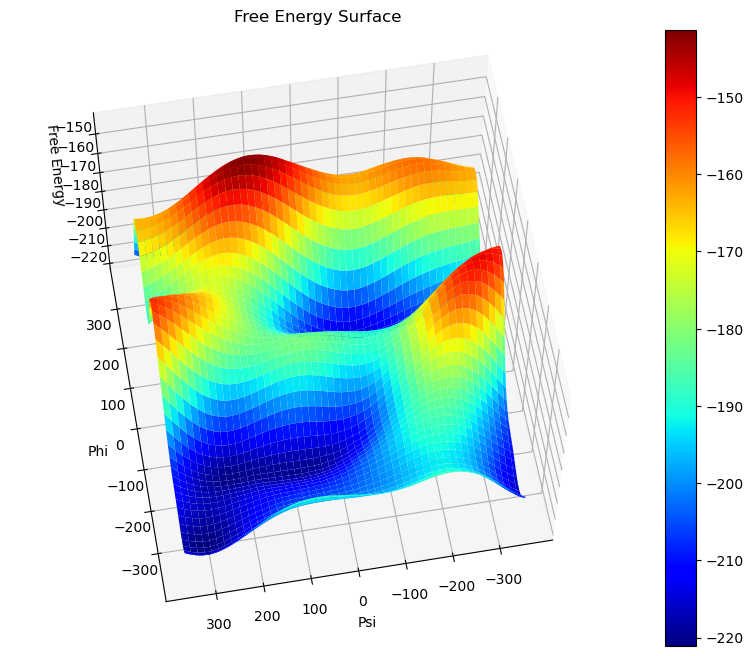

In [6]:
# 创建3D图

psi_grid, phi_grid = np.meshgrid(unique_psi[::-1], unique_phi[::-1])
fig = plt.figure()
fig.set_size_inches(10, 8)
ax = fig.add_subplot(111, projection='3d')


surf = ax.plot_surface(psi_grid*360/math.pi, phi_grid*360/math.pi, free_energy_grid, cmap='jet')
ax.view_init(elev=60, azim=80)
ax.invert_yaxis()
ax.set_xlabel('Psi')
ax.set_ylabel('Phi')
ax.set_zlabel('Free Energy')
ax.set_title('Free Energy Surface')
fig.colorbar(surf)


## Phi-theta